# 11_1.Correlation
- https://pingouin-stats.org/build/html/generated/pingouin.corr.html#pingouin.corr

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
cr_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/11_1.CR.csv', encoding="cp949")
cr_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1.0,150750.0,7388.0,5.0,6.0,1959.0,2002.0,1063.0,624.0,1327.0,0.0,1.0,1.0,1.0
1,2.0,131500.0,4435.0,6.0,5.0,2003.0,2003.0,848.0,420.0,848.0,0.0,3.0,2.0,2.0
2,3.0,160000.0,8800.0,6.0,6.0,1964.0,1964.0,1251.0,461.0,1251.0,0.0,1.0,1.0,1.0
3,4.0,187500.0,13031.0,6.0,5.0,1995.0,1996.0,691.0,409.0,691.0,807.0,1.0,1.0,1.0
4,5.0,153900.0,7892.0,6.0,5.0,1993.0,1993.0,1199.0,530.0,1199.0,0.0,3.0,2.0,2.0


### 2.2 자료구조 살펴보기

In [4]:
cr_df.shape

(1180, 14)

In [5]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      121 non-null    float64
 1   가격      121 non-null    float64
 2   연면적     121 non-null    float64
 3   품질      121 non-null    float64
 4   상태      121 non-null    float64
 5   건축년도    121 non-null    float64
 6   리모델링년도  121 non-null    float64
 7   지하면적    121 non-null    float64
 8   차고면적    121 non-null    float64
 9   면적_1층   121 non-null    float64
 10  면적_2층   121 non-null    float64
 11  주거유형    121 non-null    float64
 12  판매유형    121 non-null    float64
 13  판매조건    121 non-null    float64
dtypes: float64(14)
memory usage: 129.2 KB


In [6]:
cr_df.columns

Index(['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'],
      dtype='object')

## 3.기술통계

In [7]:
# 그룹별 기술통계
cr_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,121.0,61.000,35.074,1.0,31.0,61.0,91.0,121.0
가격,121.0,160050.653,24553.521,97000.0,144000.0,163000.0,175000.0,228000.0
연면적,121.0,8829.157,3040.173,1533.0,7200.0,9247.0,10800.0,16635.0
품질,121.0,5.901,0.723,4.0,5.0,6.0,6.0,8.0
상태,121.0,5.975,1.084,3.0,5.0,6.0,7.0,8.0
건축년도,121.0,1963.603,26.390,1890.0,1957.0,1968.0,1978.0,2009.0
리모델링년도,121.0,1982.570,18.394,1950.0,1968.0,1988.0,2000.0,2009.0
지하면적,121.0,967.207,315.738,0.0,731.0,912.0,1196.0,1844.0
차고면적,121.0,445.248,159.853,0.0,336.0,453.0,530.0,923.0
면적_1층,121.0,1119.347,317.726,483.0,848.0,1116.0,1350.0,2020.0


## 4.Correlation

In [8]:
columns = [['연면적', '품질', '상태', '건축년도', '리모델링년도',
             '지하면적', '차고면적','면적_1층', '면적_2층'], ['가격']]

pg.pairwise_corr(cr_df, columns = columns)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,연면적,가격,pearson,two-sided,121,0.895144,"[0.85, 0.93]",1.430389e-43,1.325e+40,1.000000
1,품질,가격,pearson,two-sided,121,0.397698,"[0.24, 0.54]",6.271452e-06,2706.922,0.995720
2,상태,가격,pearson,two-sided,121,-0.212236,"[-0.38, -0.04]",1.943663e-02,1.688,0.651579
3,건축년도,가격,pearson,two-sided,121,0.255337,"[0.08, 0.41]",4.705054e-03,5.884,0.812430
4,리모델링년도,가격,pearson,two-sided,121,0.163480,"[-0.02, 0.33]",7.318311e-02,0.555,0.435829
5,지하면적,가격,pearson,two-sided,121,0.350390,"[0.18, 0.5]",8.150373e-05,243.037,0.978787
6,차고면적,가격,pearson,two-sided,121,0.325337,"[0.16, 0.48]",2.714423e-04,79.393,0.957370
7,면적_1층,가격,pearson,two-sided,121,0.431133,"[0.27, 0.57]",7.947524e-07,1.92e+04,0.998927
8,면적_2층,가격,pearson,two-sided,121,0.011150,"[-0.17, 0.19]",9.033932e-01,0.115,0.051562


In [9]:
variables = ['가격','연면적', '품질', '상태', '건축년도', '리모델링년도',
             '지하면적', '차고면적','면적_1층', '면적_2층']

cr_df[variables].rcorr()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층
가격,-,***,***,*,**,,***,***,***,
연면적,0.895,-,***,,*,,***,***,***,
품질,0.398,0.346,-,,,,,,,***
상태,-0.212,-0.14,-0.088,-,***,*,*,,,
건축년도,0.255,0.2,0.121,-0.444,-,**,*,*,,**
리모델링년도,0.163,0.121,0.155,0.211,0.271,-,,,,
지하면적,0.35,0.352,-0.08,-0.212,0.188,-0.129,-,*,***,***
차고면적,0.325,0.41,0.082,-0.084,0.221,-0.032,0.223,-,***,*
면적_1층,0.431,0.508,-0.028,-0.145,0.008,-0.082,0.605,0.415,-,***
면적_2층,0.011,-0.02,0.317,-0.031,-0.251,0.101,-0.566,-0.225,-0.532,-


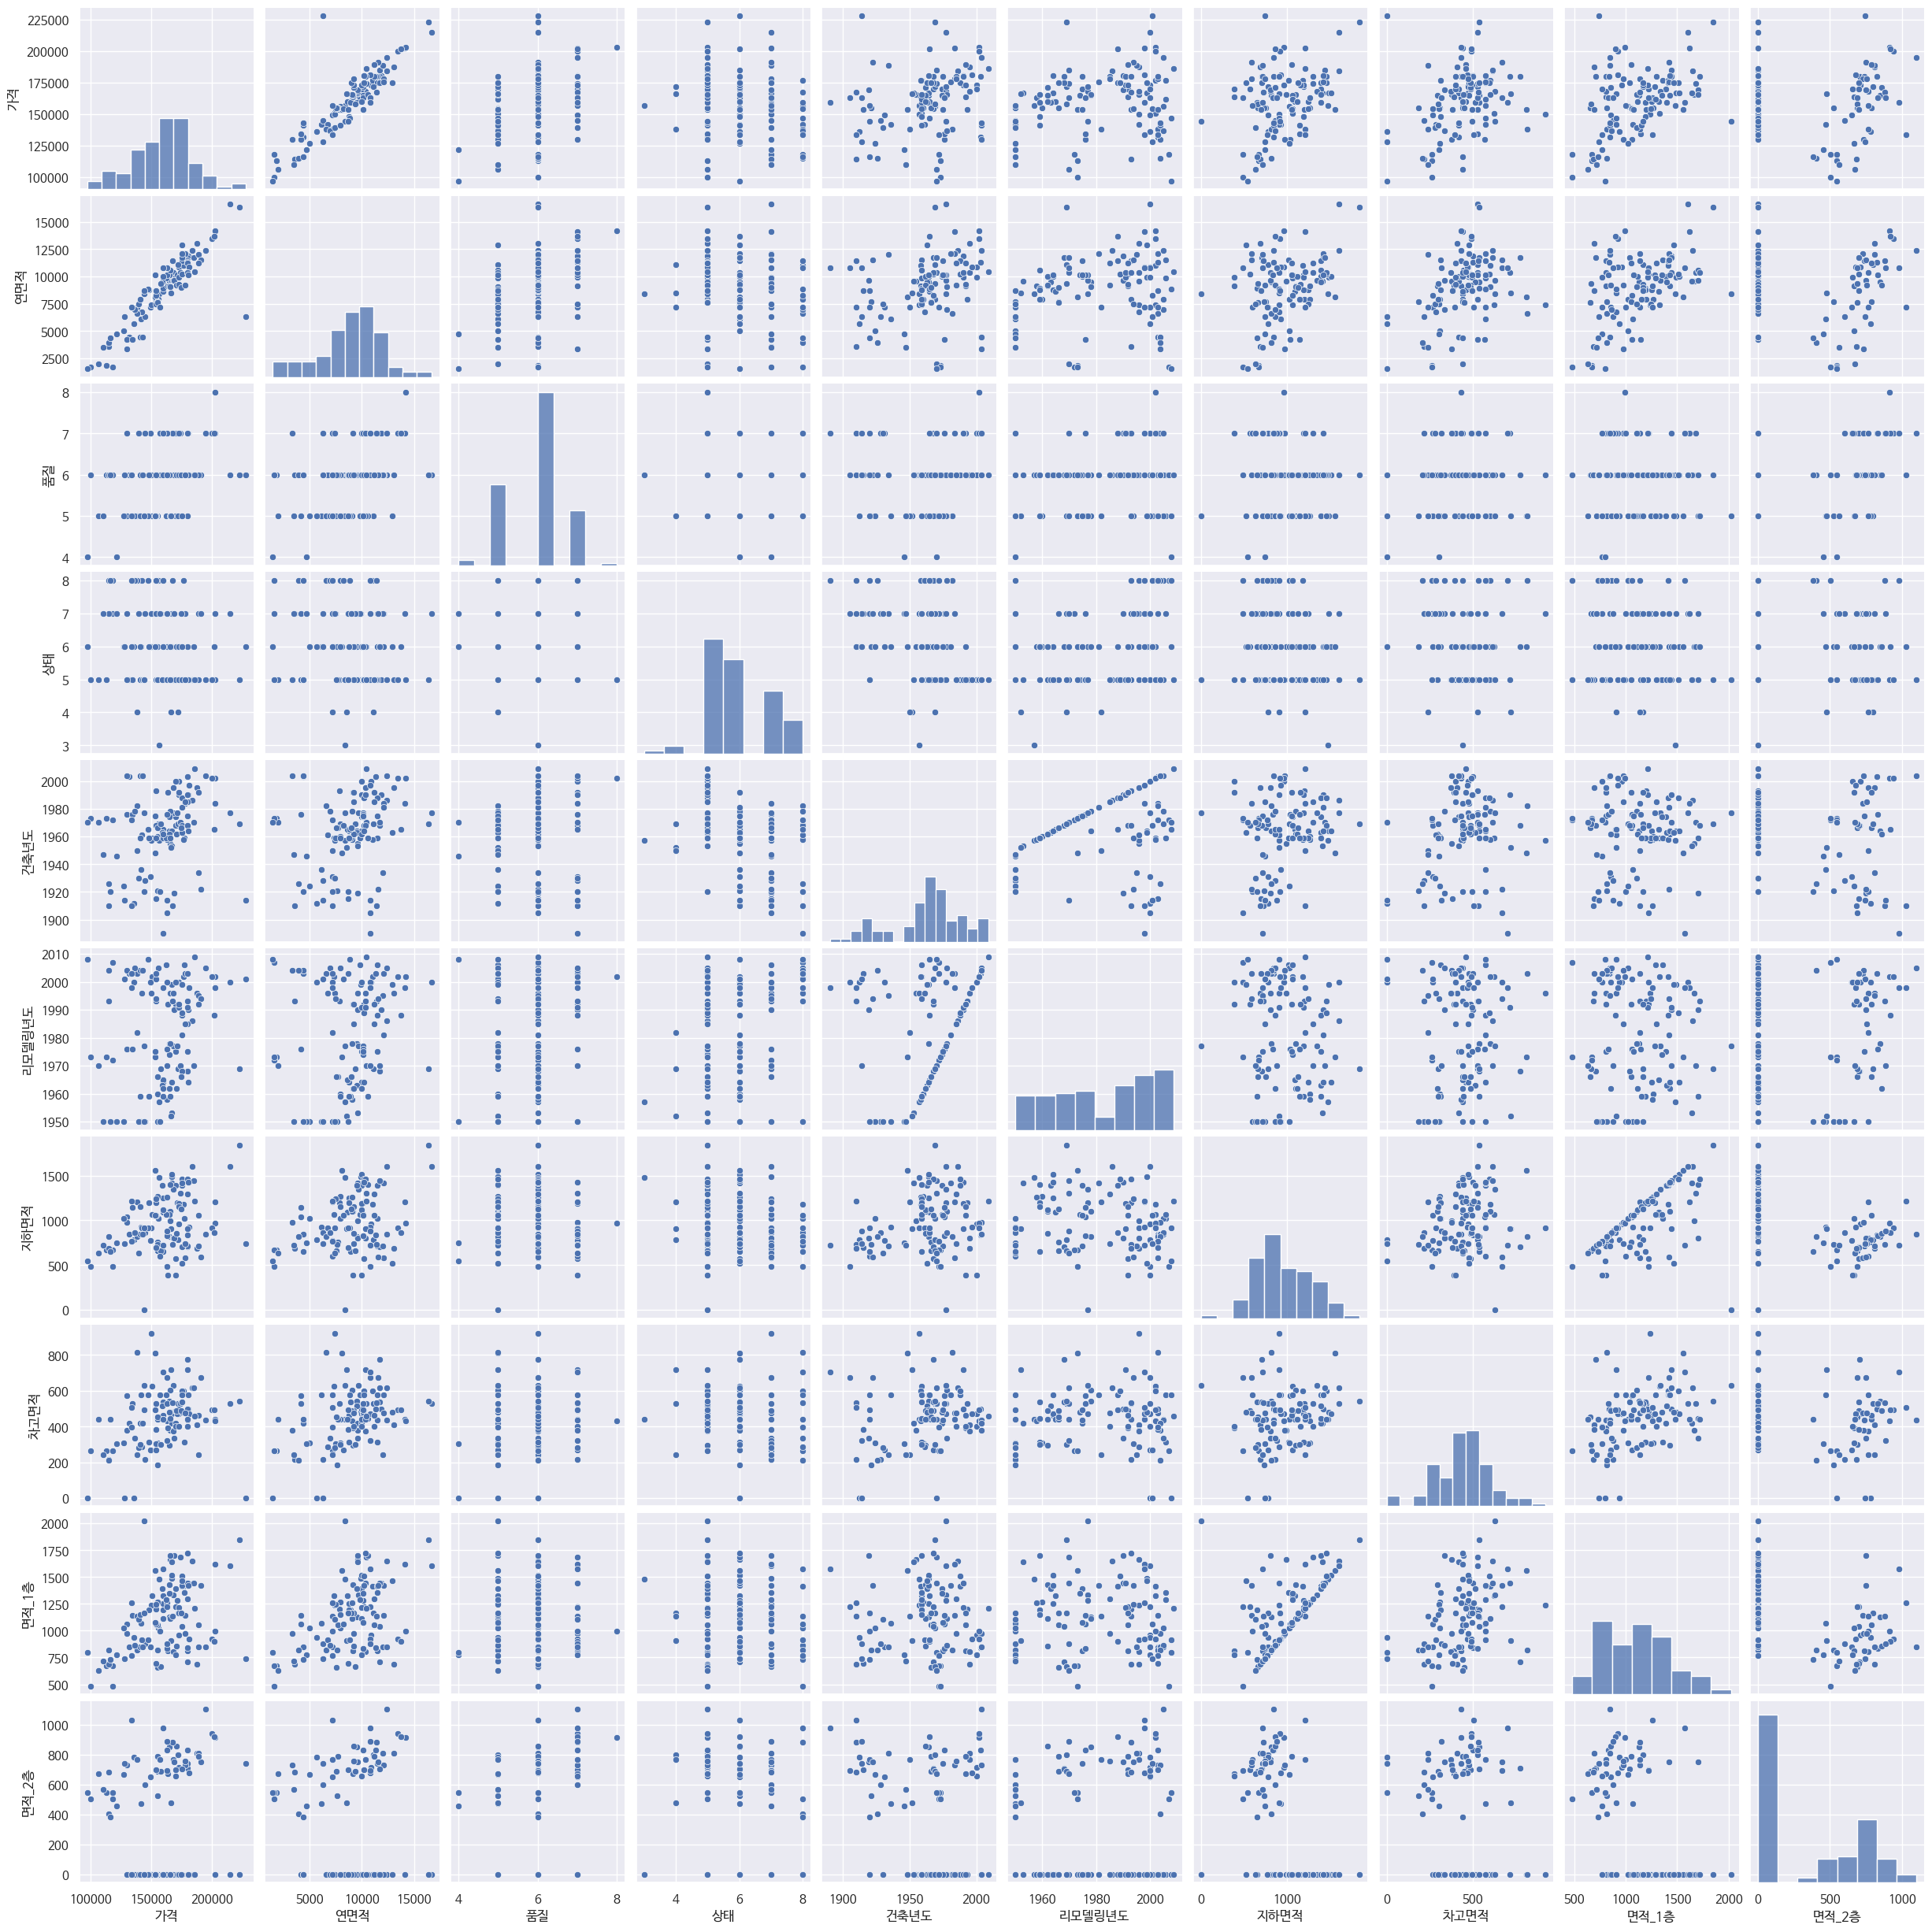

In [10]:
sns.pairplot(vars = variables,
             data = cr_df)
plt.show()